In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info() #float64 değerine sahip olan columnlarda eğer 1 tane bile sting değer karışmış olsa idi object gözükecekti.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
print(df.shape)

(344, 7)


In [8]:
df.describe(include='all') #include all demeseydik sadece sayısal olan columnların bilgisini getiricekti. sayısal olmayan columlarda std gibi değerler bakamak mümkün değilsir

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [9]:
df.corr()

C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\2519551295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap ='coolwarm')


<AxesSubplot: >

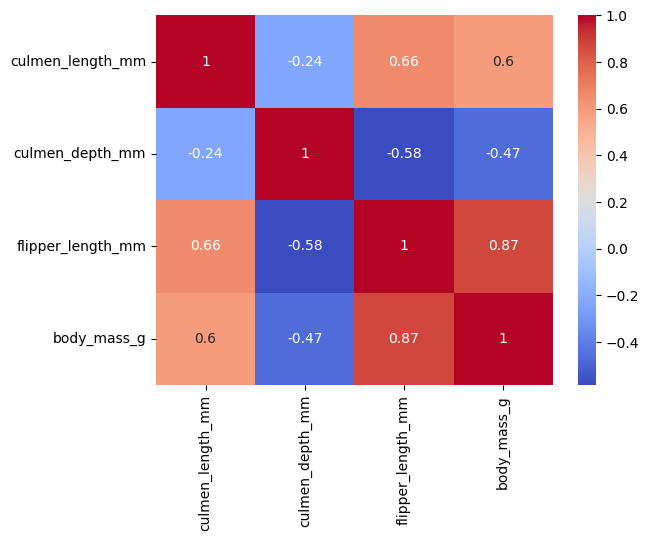

In [13]:
sns.heatmap(df.corr(), annot=True, cmap ='coolwarm')

In [15]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [20]:
#columların hangisinde yüzdelik olarak ne kadar eksik var
nan_percentage = df.isna().sum() / df.count() * 100
nan_percentage

species              0.000000
island               0.000000
culmen_length_mm     0.584795
culmen_depth_mm      0.584795
flipper_length_mm    0.584795
body_mass_g          0.584795
sex                  2.994012
dtype: float64

In [19]:
nan_count = df.isna().sum()
nan_count

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [22]:
nan_table = pd.concat([nan_count, nan_percentage], axis=1)
nan_table.columns = ['Count', 'Percantage']
nan_table

,Count,Percantage
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.584795
culmen_depth_mm,2,0.584795
flipper_length_mm,2,0.584795
body_mass_g,2,0.584795
sex,10,2.994012


In [23]:
#missing value doldurmak
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy='most_frequent')

In [26]:
df.iloc[: :] = imputer.fit_transform(df) #imputer en çok tekrarlanan değer ile null değerlerimizi tamamaladı

In [28]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [35]:
#cinsiyetler sayı cinsine çevirdik
le = LabelEncoder()
df['gender'] = le.fit_transform(df['sex']) #fit_transform fit et ve dönüştür yani fit ettiğin değerleri yerine yaz.
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,1
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1,1


In [36]:
df['gender'].value_counts() # . koyduğu kısım yüksek ihtimal tanımlanamaya bir veriye falan ait olabilir

2    178
1    165
0      1
Name: gender, dtype: int64

In [37]:
df = df.drop(labels = ['sex'], axis = 1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [61]:
species_count = df['species'].value_counts().reset_index() #reset index indexleri sıfırladı indexteki değerler ise column olarak geldi
species_count

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


<AxesSubplot: xlabel='index', ylabel='species'>

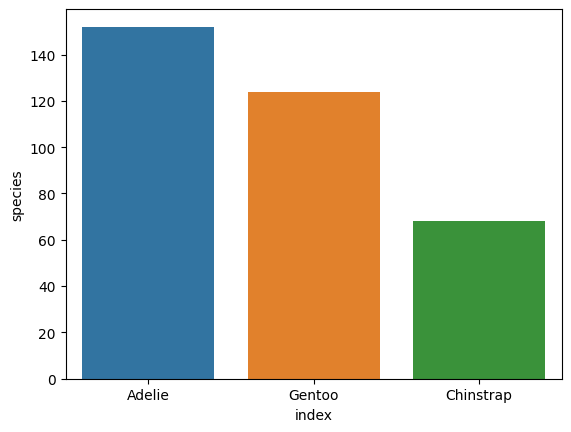

In [41]:
sns.barplot(data=species_count, x='index', y='species')

In [65]:
df[df['species'] == 'Adelie']['body_mass_g'] #species'i adelie olanların body mass değerlerini gösterir

0      3750.0
1      3800.0
2      3250.0
3      3800.0
4      3450.0
        ...  
147    3475.0
148    3450.0
149    3750.0
150    3700.0
151    4000.0
Name: body_mass_g, Length: 152, dtype: float64

C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\3968431339.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec]['body_mass_g'], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\3968431339.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec]['body_mass_g'], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\3968431339.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec]['body_mass_g'], shade = True, label = spec)


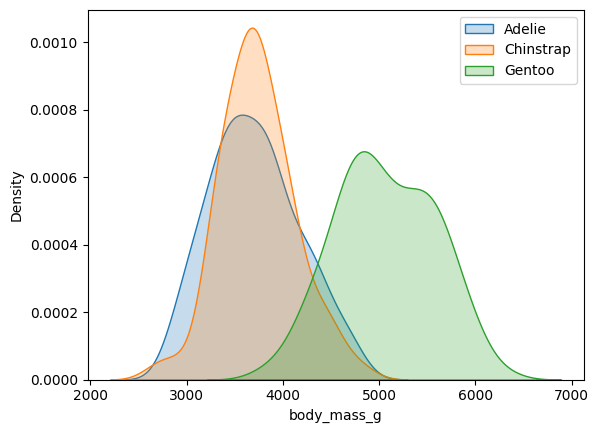

In [59]:
for spec in df['species'].unique():
    sns.kdeplot(df[df['species'] == spec]['body_mass_g'], shade = True, label = spec)
    plt.legend()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

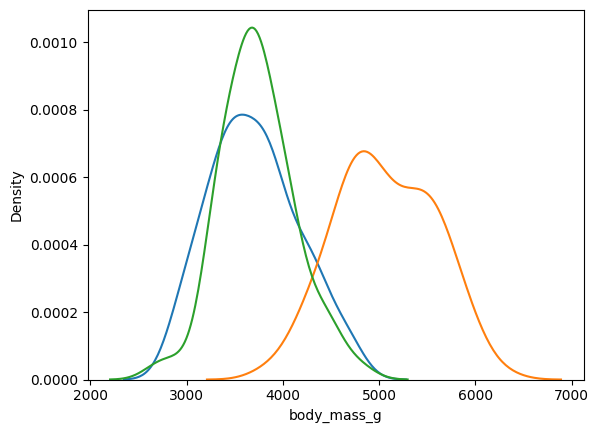

In [46]:
sns.kdeplot(df[df['species'] == 'Adelie']['body_mass_g']) #türü adelie olan penguenlerin body mass dağılım grafiği
sns.kdeplot(df[df['species'] == 'Gentoo']['body_mass_g'])
sns.kdeplot(df[df['species'] == 'Chinstrap']['body_mass_g'])

C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)


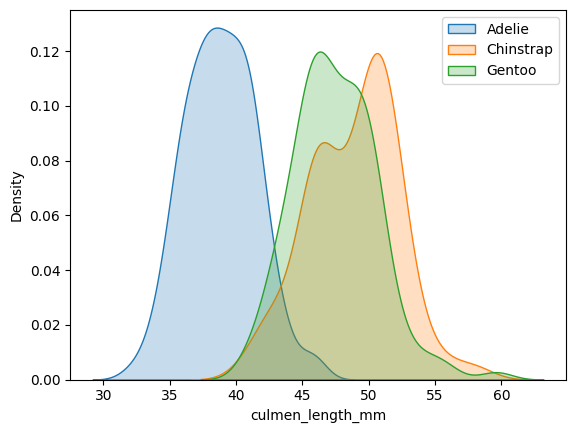

C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)


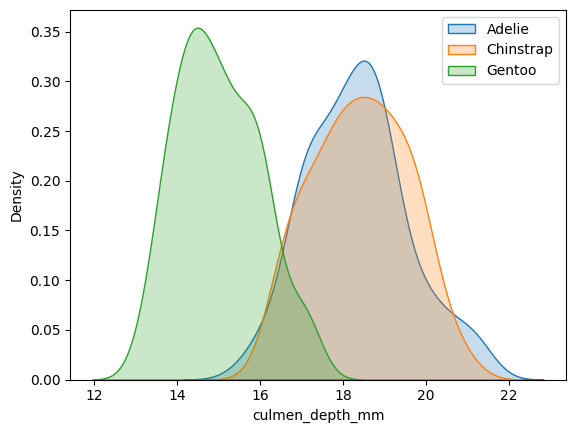

C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)


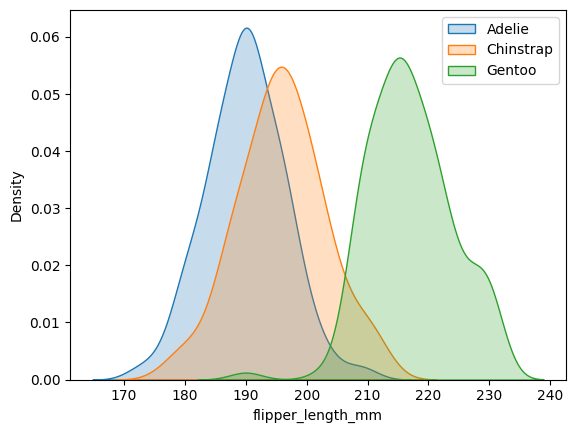

C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
C:\Users\mehme\AppData\Local\Temp\ipykernel_16792\190604833.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)


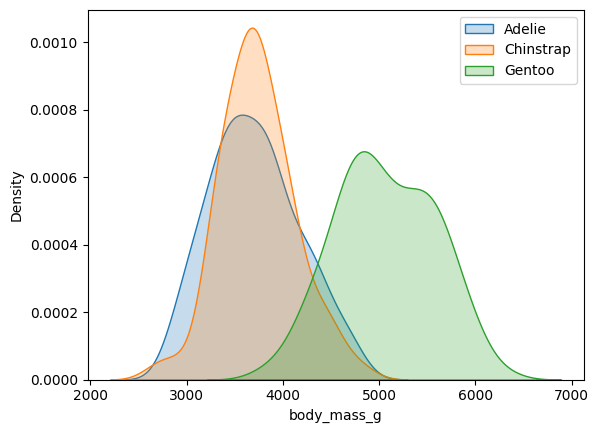

In [68]:
#sadece body_mass_g için değil diğer bütün columnların species değerleine göre (Adelie, Gentoo, Chinstrap) densitylerinin(yoğunluk) hesaplanması.
for col in df.columns[2:-1]:
    for spec in df['species'].unique():
        sns.kdeplot(df[df['species'] == spec][col], shade = True, label = spec)
        plt.legend()
    plt.show()

c:\Users\mehme\Masaüstü\datascience-mer-cob\datasienceENV\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


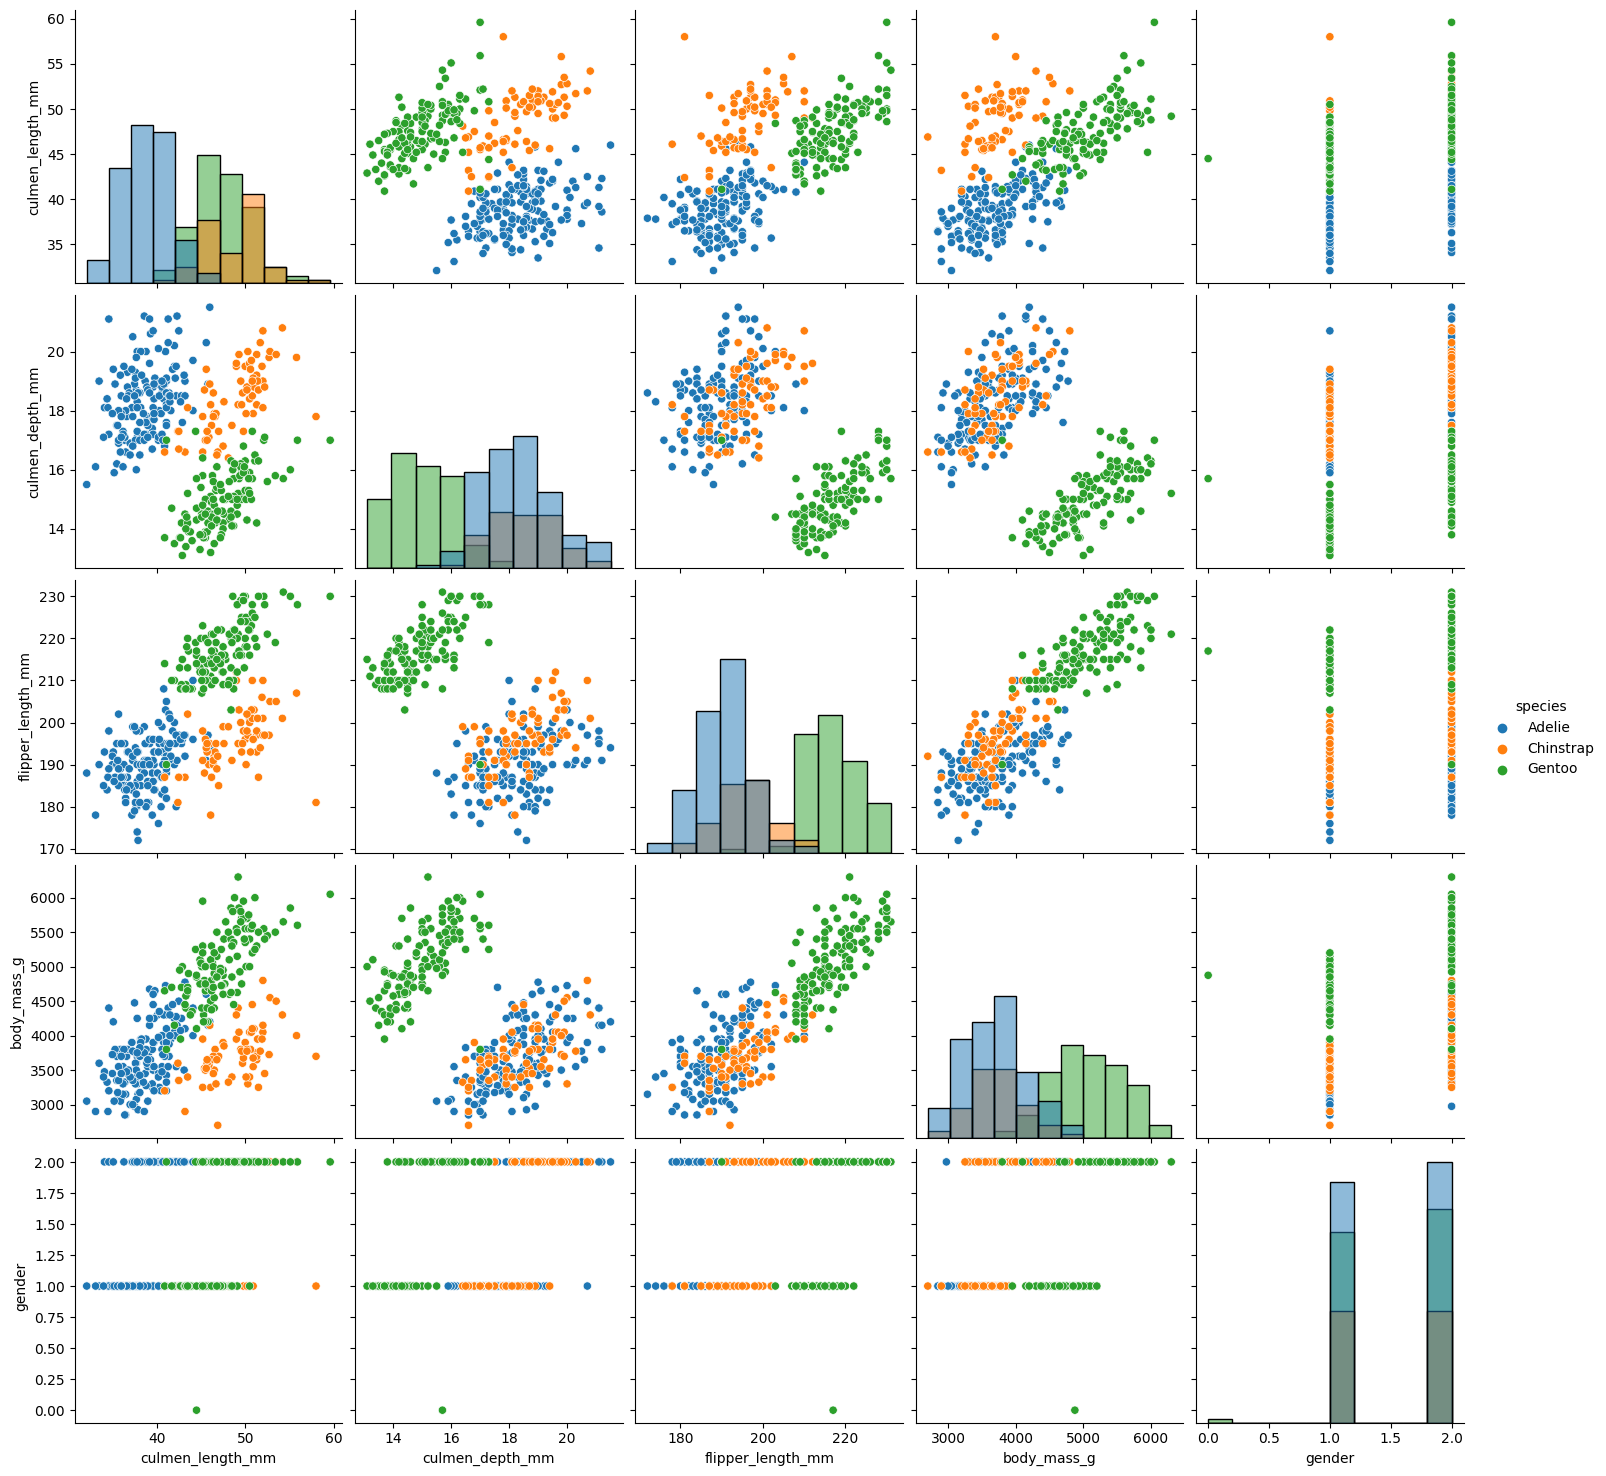

In [69]:
sns.pairplot(df, hue='species', size=3, diag_kind='hist')

In [70]:
#machine learning
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [72]:
#One Hot Encoding species ve island columnlarına yapılacak.
pd.get_dummies(df[['island']]) #get dummies bunu kolaylaştırı

,island_Biscoe,island_Dream,island_Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
339,1,0,0
340,1,0,0
341,1,0,0
342,1,0,0


Üstte gördüğümüz gibi 0. indexteki island değeri ne ise o bir diğerleri 0 ile işaretlenmiş şimdi biz ilk column olan Bisoce yi kaldırırsak eğer Dream ve Toegersen 0 ise Biscoe 1 olmuş olucak zaten Dream yada Torgersen den 1 tanesi 1 ise değerimizi bilmiş olucaz bunun için ilk column olan Biscoe yi kalırmak bize etki etmez.

In [75]:
island = pd.get_dummies(df[['island']], drop_first=True)
island

,island_Dream,island_Torgersen
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
339,0,0
340,0,0
341,0,0
342,0,0


In [84]:
df2 = pd.concat([df, island], axis =1).drop(['island'], axis = 1)

In [85]:
df2.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,1
3,Adelie,41.1,17.0,190.0,3800.0,2,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,1


In [89]:
target, features = df.species, df2.drop('species', axis=1)
target

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [90]:
features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,2,0,1
1,39.5,17.4,186.0,3800.0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,1
3,41.1,17.0,190.0,3800.0,2,0,1
4,36.7,19.3,193.0,3450.0,1,0,1
...,...,...,...,...,...,...,...
339,41.1,17.0,190.0,3800.0,2,0,0
340,46.8,14.3,215.0,4850.0,1,0,0
341,50.4,15.7,222.0,5750.0,2,0,0
342,45.2,14.8,212.0,5200.0,1,0,0


In [91]:
from sklearn.preprocessing import StandardScaler #scale etmem gereken değerler için gerekn kütüphane

In [92]:
scaler = StandardScaler()

In [93]:
scaler.fit(features.iloc[:, :4]) #neden fit transform yapmadık gelecekte bu columnların hangi standart scalingde ölçeklendiğini tekrar hatırlamak isityorsak
#yada başka bir zaman kullanıcaksak bunu ayırmamız lazım neden diyelimki elimize yeni bi veri geldi onuda scale etmek istediğimizde o yeni gelen 
#verinin kendi standart sapması ve ortalaması ile scaling işlemi yapıcak biz bunu istemiyoruz ve tutuyoruz.


StandardScaler()

In [96]:
features.iloc[:, :4] = scaler.transform(features.iloc[:, :4])
features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,-8.233318,-8.321707,-14.422073,-5.256323,2,0,1
1,-8.219801,-8.657978,-14.396653,-5.256245,1,0,1
2,-8.192768,-8.502776,-14.350897,-5.257106,1,0,1
3,-8.165734,-8.761446,-14.376317,-5.256245,2,0,1
4,-8.314418,-8.166505,-14.361065,-5.256793,1,0,1
...,...,...,...,...,...,...,...
339,-8.165734,-8.761446,-14.376317,-5.256245,2,0,0
340,-7.973122,-9.459855,-14.249217,-5.254600,1,0,0
341,-7.851472,-9.097717,-14.213629,-5.253191,2,0,0
342,-8.027189,-9.330520,-14.264469,-5.254052,1,0,0


In [99]:
#targetlarımızı label encoding yapalım
from sklearn.preprocessing import LabelEncoder

In [106]:
le = LabelEncoder()
target_encoded = le.fit_transform(target)
target_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [101]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=41)

In [109]:
print(X_train.shape)
print(X_test.shape)

(275, 7)
(69, 7)


In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [112]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
predict = tree.predict(X_test)

In [115]:
#test edicez
confusion_matrix(y_test, predict)

array([[28,  1,  0],
       [ 1, 11,  0],
       [ 1,  0, 27]], dtype=int64)

<AxesSubplot: >

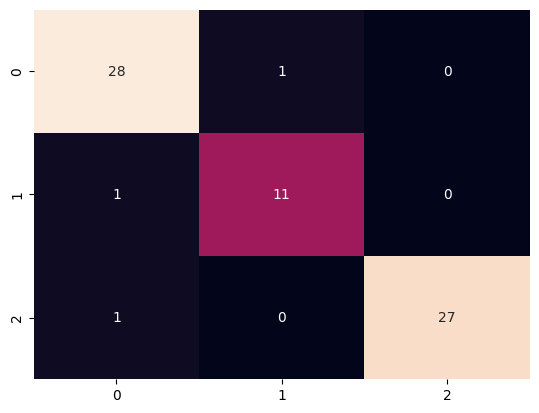

In [117]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cbar=False)

In [118]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.92      0.92      0.92        12
           2       1.00      0.96      0.98        28

    accuracy                           0.96        69
   macro avg       0.95      0.95      0.95        69
weighted avg       0.96      0.96      0.96        69



In [119]:
accuracy_score(y_test, predict) * 100

95.65217391304348